# 1.1

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   
        
    def clopper_pearson(k, n, alpha):
        '''TODO alpha = 1 - p'''
        left = st.norm.ppf(alpha/2, k, n-k+1)
        right = st.norm.ppf(1 - alpha/2, k+1, n-k)
        return (left, right)
        
    def __str__(self):
        return str(self.values)
    

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))


# 1.2

In [5]:
num_bins = 20


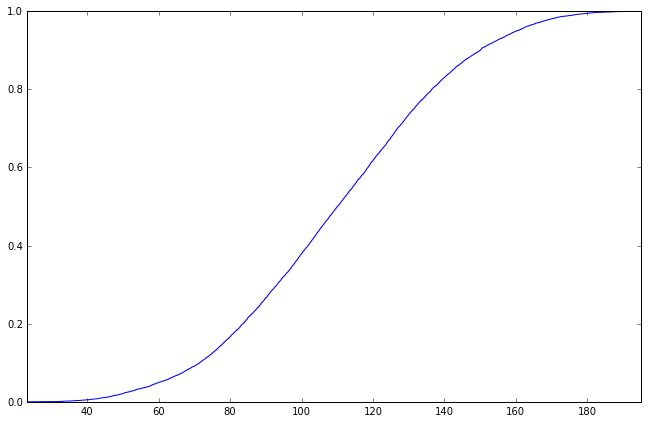

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()


[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


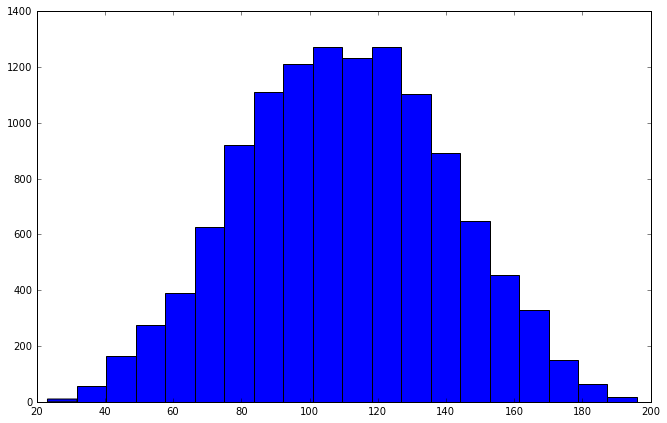

[   2.   10.   19.   22.   42.   66.  104.   98.  114.  118.  105.  120.
  122.   81.   65.   47.   33.   35.   10.    7.]


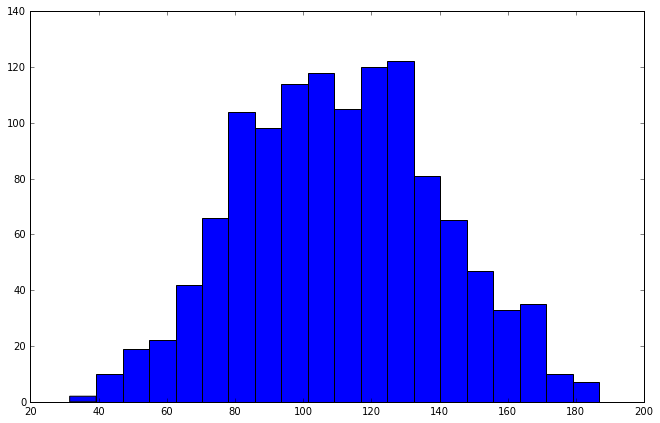

[   9.   14.   28.   36.   49.   78.   91.   98.  114.  108.  116.  111.
  101.   91.   55.   44.   34.   22.   16.    5.]


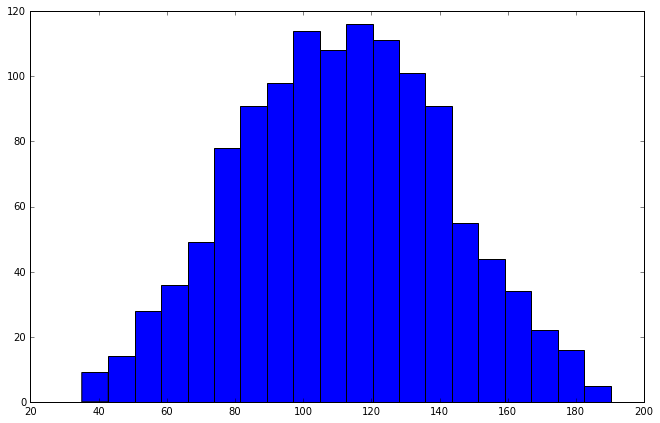

[   7.   11.   16.   35.   56.   77.   75.  117.  128.  110.  108.  110.
  106.   95.   64.   49.   25.   19.    8.    4.]


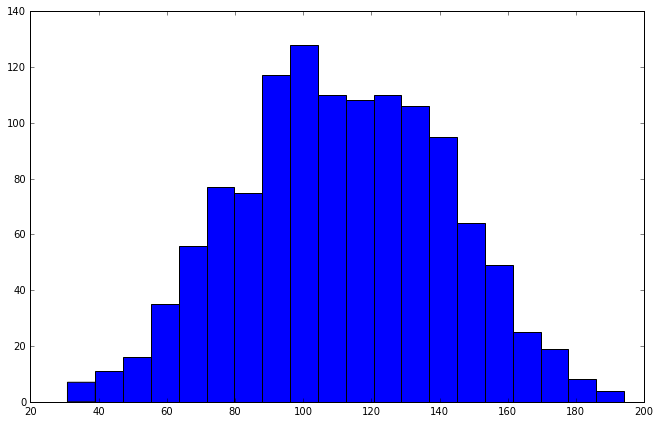

[   2.    8.   22.   39.   45.   63.   99.   94.  108.  121.  119.  114.
  123.   89.   75.   43.   32.   20.    2.    2.]


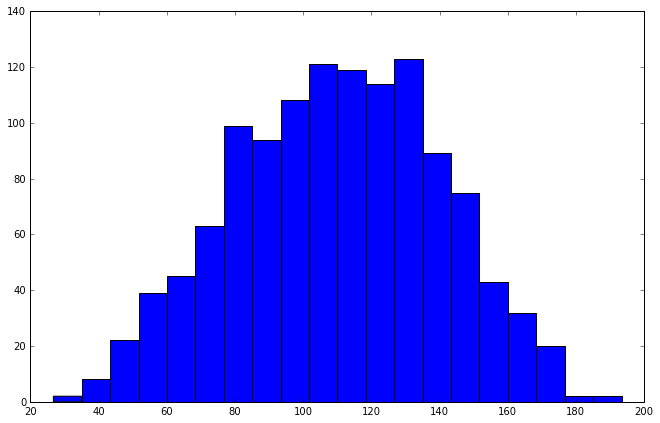

[   5.    6.   22.   17.   36.   68.   74.  102.  113.  130.  110.  116.
  124.   93.   78.   51.   41.   18.   11.    5.]


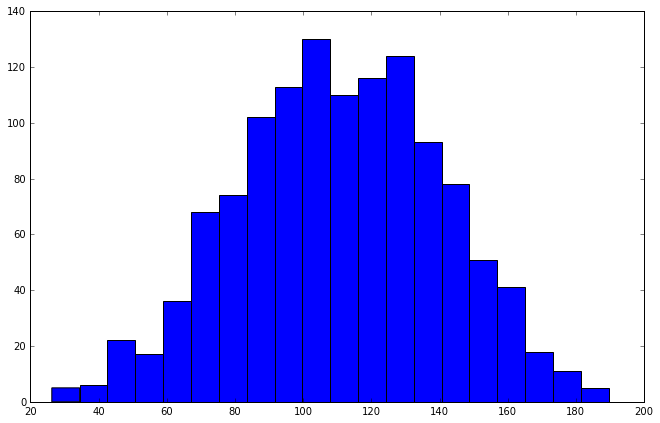

[   9.   13.   32.   37.   50.   77.  103.  111.  125.  124.  119.  109.
   95.   70.   57.   40.   29.   12.    7.    1.]


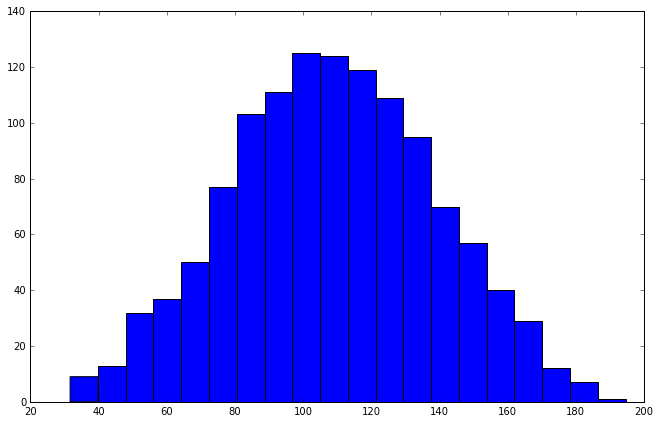

[  10.   30.   23.   37.   59.  106.  106.   98.  110.  126.  108.  109.
   88.   68.   55.   41.   26.   12.    4.    4.]


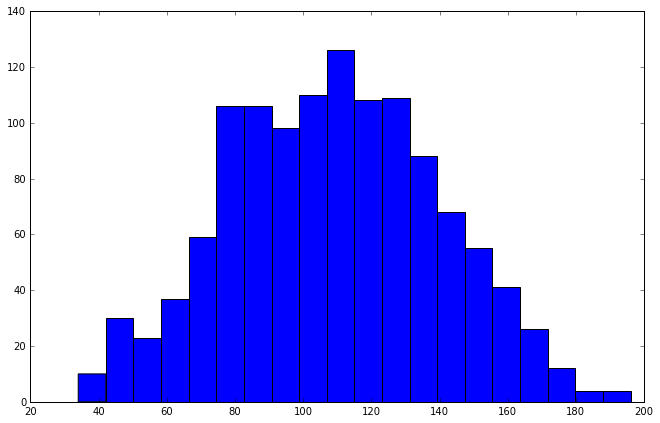

[   4.   15.   33.   37.   39.   75.  107.  100.  110.  118.  101.  116.
   93.   76.   64.   50.   41.   18.   16.    7.]


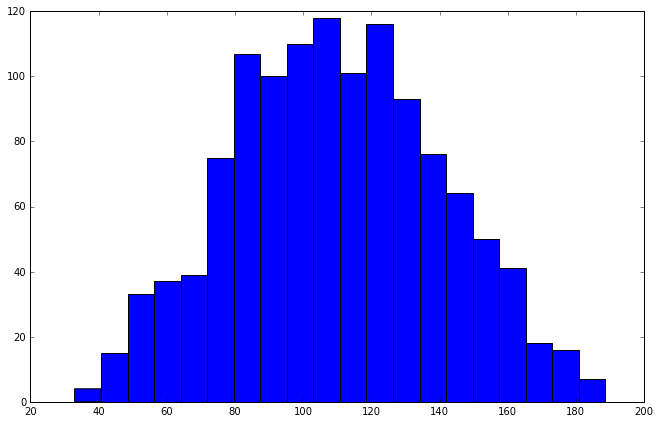

[   6.   13.   24.   34.   46.   66.   90.  104.  129.  123.  107.  118.
  101.   66.   76.   51.   38.   18.    9.    1.]


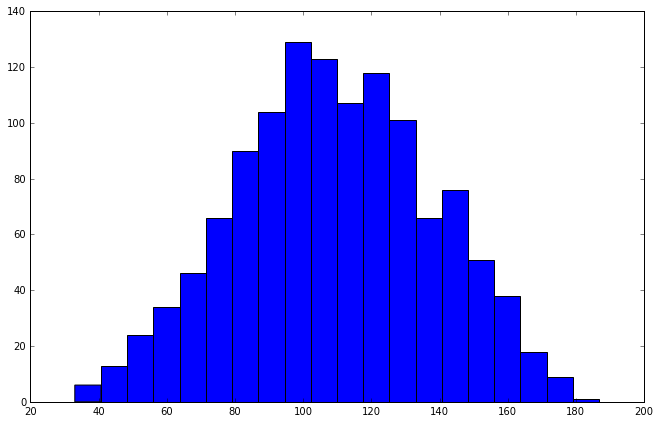

[   3.    3.   10.   20.   27.   52.   90.   90.  102.  119.  110.  150.
  116.  103.   66.   54.   47.   35.   16.    7.]


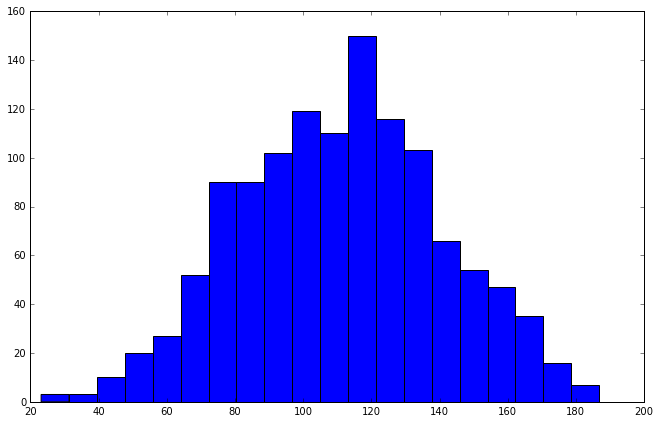

In [7]:
for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()


# 1.3

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)


In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,110.822376,110.7940,109.14880,138.1790,847.026431,29.103719,1538.718141,1.856240e+06,0.062419,-0.412740
2,111.411100,111.6930,112.62110,120.0410,921.926366,30.363240,670.503058,2.177649e+06,0.023953,-0.437904
3,111.309501,111.1410,112.51430,91.1949,922.930928,30.379778,-21.437863,2.149025e+06,-0.000765,-0.477082
4,109.865000,110.4865,110.06520,120.2940,909.144526,30.152024,-2394.370628,2.015877e+06,-0.087346,-0.561076
5,110.856657,110.8520,107.95185,123.4830,887.305062,29.787666,-1876.685930,2.070664e+06,-0.071004,-0.369952
6,108.761600,108.7195,113.11345,102.7820,904.888144,30.081359,50.843274,2.121544e+06,0.001868,-0.409031
7,108.795917,108.8000,115.03800,107.1970,955.176594,30.905931,1661.338158,2.320967e+06,0.056277,-0.456090
8,109.756044,108.7055,110.79215,88.4999,944.628917,30.734816,1937.962851,2.224184e+06,0.066750,-0.507424
9,108.891900,108.1095,109.92400,33.0440,837.685867,28.942803,-506.177153,1.791348e+06,-0.020878,-0.447195


In [10]:
df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
df.to_csv('table.csv')

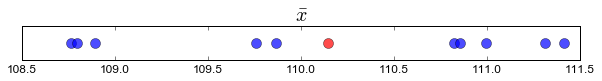

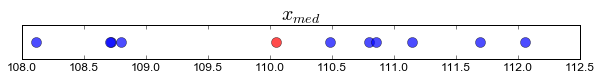

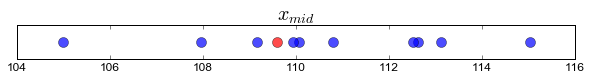

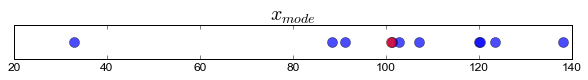

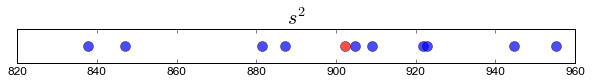

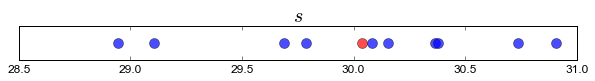

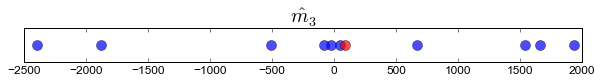

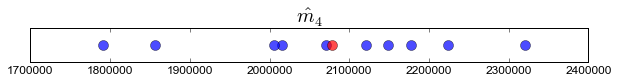

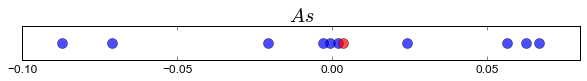

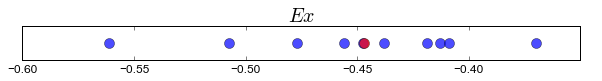

In [11]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 0.6))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [12]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка:
$$J_{0.95} \approx [51, 168]$$

# 1.4

In [13]:
for sample in samples:
    print(sample.interval_mean(0.8))

(109.7979834100417, 110.49503826208945)
(109.75396067629399, 111.89079112698471)
(110.29644679622679, 112.52575287590436)
(110.19424074559355, 112.42476105768513)
(108.75810061162171, 110.97189889657501)
(109.7631340947664, 111.95018082326641)
(107.6572948426073, 109.86590482952384)
(107.66134141064173, 109.93049252378454)
(108.62775061778041, 110.88433823467861)
(107.82939247745409, 109.95440834221802)
(109.90516523966942, 112.08486049803552)


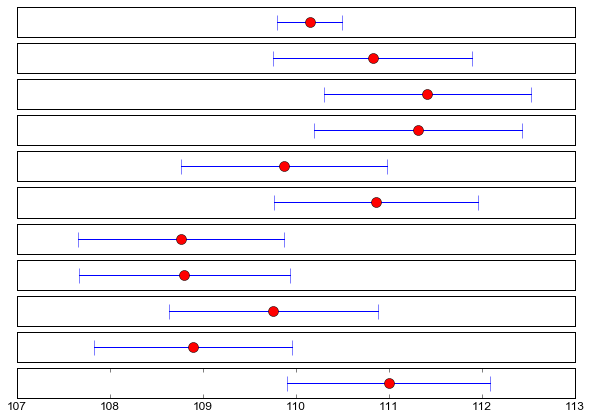

In [14]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

In [15]:
for sample in samples:
    print(sample.interval_variance(0.8))

(887.6282171287985, 917.24305488751872)
(804.96812606613753, 893.05992839837597)
(876.14897484219773, 972.03046356967911)
(877.10365595733128, 973.08962034957676)
(864.00180470205555, 958.55396612298773)
(843.24675940663496, 935.52758946877668)
(859.95676949706296, 954.06626191015926)
(907.74819351545534, 1007.0877472707054)
(897.72425142103668, 995.9668336354548)
(796.09135853945179, 883.21173054421683)
(837.58736077466381, 929.24885373579093)


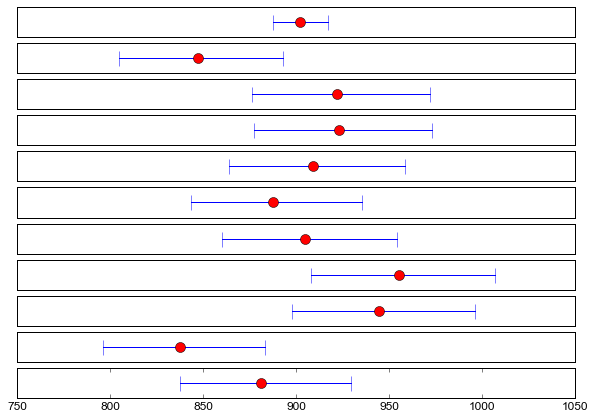

In [16]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

# 2.1

Остановим выбор на трех основных распределениях:
* Нормальное
* Логнормальное
* Гамма (Эрланга)

<img src="dist_info.png" width=1000px>

# 2.2

## Нормальное распределение

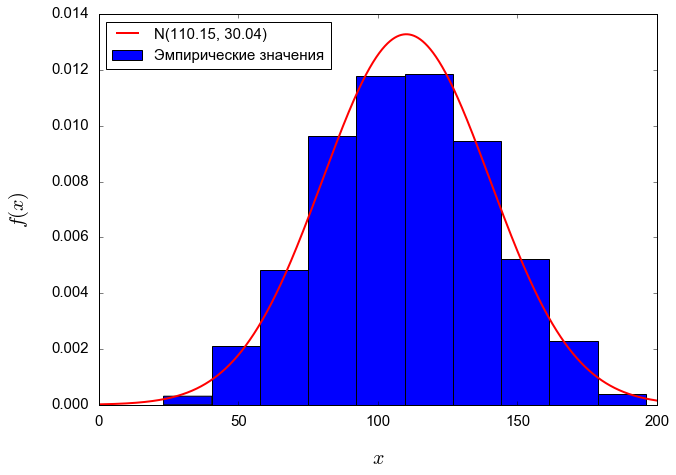

In [17]:
import matplotlib.mlab as mlab

s = samples[0]

loc, scale = st.norm.fit(s.values)
xes = np.linspace(0, 200, num)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, st.norm.pdf(xes, loc=loc, scale=scale), label='N({0:.2f}, {1:.2f})'.format(loc, scale), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_norm.png')
plt.show()

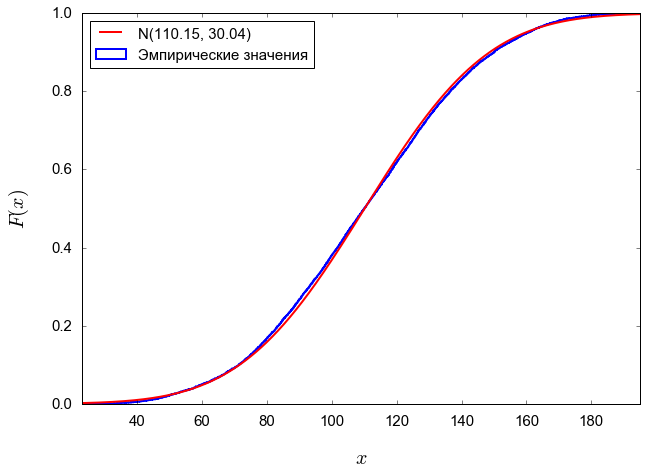

In [18]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, st.norm.cdf(xes, loc=loc, scale=scale), label='N({0:.2f}, {1:.2f})'.format(loc, scale), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_norm.png')
plt.show()


## Логнормальное распределение

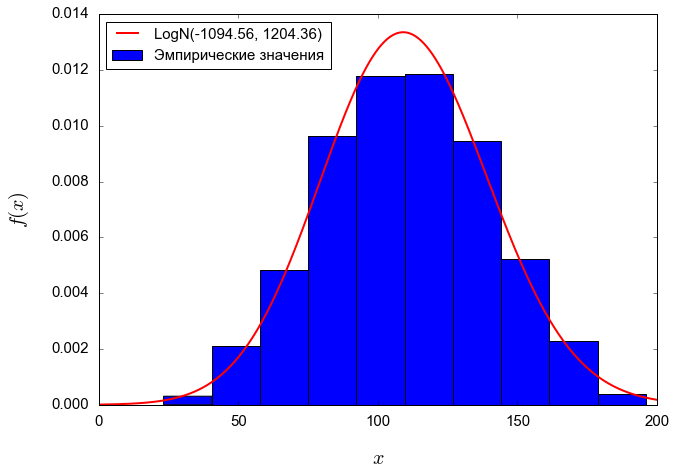

In [19]:
shape, loc, scale = st.lognorm.fit(s.values)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, st.lognorm.pdf(xes, shape, loc=loc, scale=scale), label='LogN({0:.2f}, {1:.2f})'.format(loc, scale), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_lognorm.png')
plt.show()

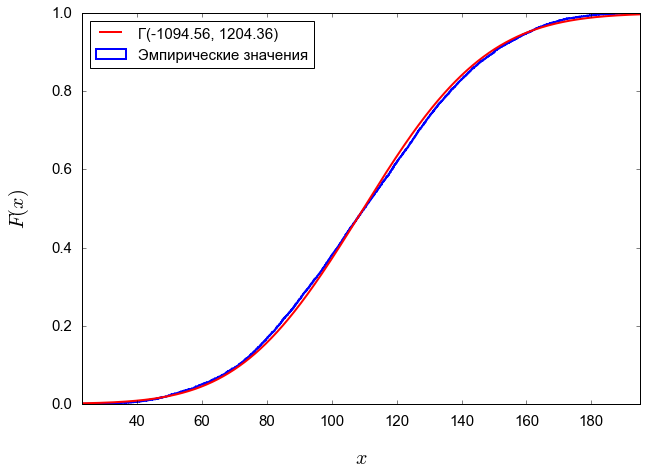

In [20]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, st.lognorm.cdf(xes, shape, loc=loc, scale=scale), label='Г({0:.2f}, {1:.2f})'.format(loc, scale), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_lognorm.png')
plt.show()

## Гамма-распределение

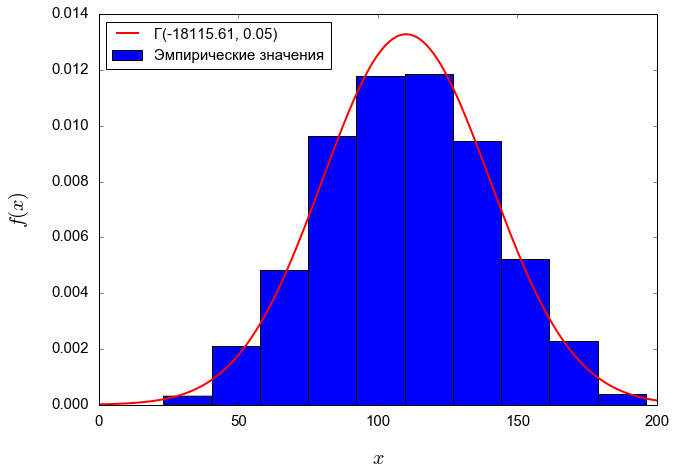

In [21]:
shape, loc, scale = st.gamma.fit(s.values)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, st.gamma.pdf(xes, a=shape, loc=loc, scale=scale), label='Г({0:.2f}, {1:.2f})'.format(loc, scale), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_gamma`.png')
plt.show()

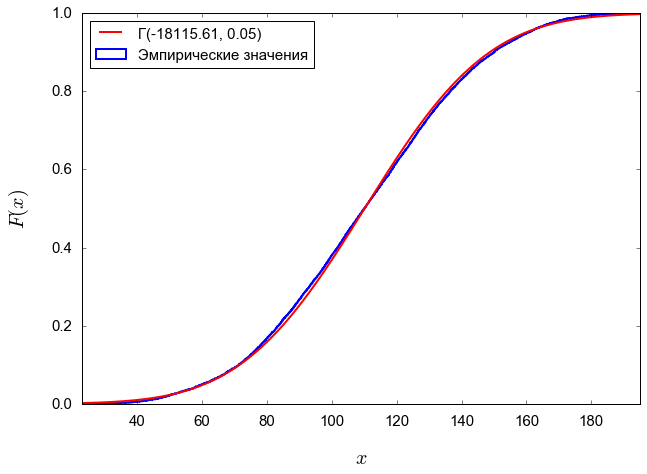

In [22]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, st.gamma.cdf(xes, a=shape, loc=loc, scale=scale),label='Г({0:.2f}, {1:.2f})'.format(loc, scale), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_gamma.png')
plt.show()